In [25]:
%matplotlib inline
# Standard scientific Python imports
import matplotlib.pyplot as plt

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

How a raw image looks: 

In [2]:
digits = datasets.load_digits()
print(digits.images[0])

[[  0.   0.   5.  13.   9.   1.   0.   0.]
 [  0.   0.  13.  15.  10.  15.   5.   0.]
 [  0.   3.  15.   2.   0.  11.   8.   0.]
 [  0.   4.  12.   0.   0.   8.   8.   0.]
 [  0.   5.   8.   0.   0.   9.   8.   0.]
 [  0.   4.  11.   0.   1.  12.   7.   0.]
 [  0.   2.  14.   5.  10.  12.   0.   0.]
 [  0.   0.   6.  13.  10.   0.   0.   0.]]


The data that we are interested in is made of 8x8 images of digits, let's have a look at the first 4 images, stored in the *images* attribute of the dataset.  If we were working from image files, we could load them using matplotlib.pyplot.imread.  Note that each image must have the same size. For these images, we know which digit they represent: it is given in the 'target' of the dataset.

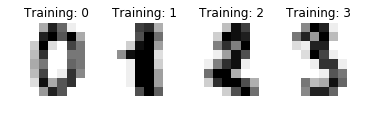

In [3]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Training: %i' % label)

To apply a classifier on this data, we need to flatten the image, to  turn the data in a (samples, feature) matrix:

In [4]:

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))
print data[0]


[  0.   0.   5.  13.   9.   1.   0.   0.   0.   0.  13.  15.  10.  15.   5.
   0.   0.   3.  15.   2.   0.  11.   8.   0.   0.   4.  12.   0.   0.   8.
   8.   0.   0.   5.   8.   0.   0.   9.   8.   0.   0.   4.  11.   0.   1.
  12.   7.   0.   0.   2.  14.   5.  10.  12.   0.   0.   0.   0.   6.  13.
  10.   0.   0.   0.]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(data, digits.target, test_size=0.5, random_state=42)

In [6]:
print(len(X_train))
print(len(y_train))

print(len(X_test))
print(len(y_test))

898
898
899
899


How an image looks:

# Logistic Regression Classifier

In [7]:

# Create a classifier: a support vector classifier
classifier = LogisticRegression()
# We learn the digits on the first half of the digits
classifier.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [8]:
predicted = classifier.predict(X_test)

In [9]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False):
             precision    recall  f1-score   support

          0       1.00      0.99      0.99        82
          1       0.95      0.89      0.92        89
          2       0.94      0.99      0.96        83
          3       0.95      0.89      0.92        93
          4       0.96      0.99      0.97        93
          5       0.98      0.94      0.96        99
          6       0.99      0.98      0.98        98
          7       0.92      0.99      0.96        87
          8       0.81      0.93      0.87        83
          9       0.99      0.91      0.95        92

avg / total       0.95      0.95      0.95       899




In [10]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

Confusion matrix:
[[81  0  0  0  1  0  0  0  0  0]
 [ 0 79  4  0  1  0  0  0  5  0]
 [ 0  0 82  1  0  0  0  0  0  0]
 [ 0  0  0 83  0  0  0  4  6  0]
 [ 0  0  0  0 92  0  0  0  1  0]
 [ 0  1  1  1  0 93  1  1  1  0]
 [ 0  0  0  0  1  1 96  0  0  0]
 [ 0  0  0  0  0  0  0 86  0  1]
 [ 0  3  0  0  1  1  0  1 77  0]
 [ 0  0  0  2  0  0  0  1  5 84]]


In [11]:
print("Acurracy:\n%s" % metrics.classification.accuracy_score(y_test, predicted))

Acurracy:
0.948832035595


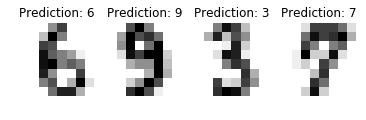

In [12]:
images_and_predictions = list(zip(map(lambda x: x.reshape(8,8), X_test), predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

# Support  Vector machine Example

In [93]:
classifier = svm.SVC() # def
classifier.fit(X_train, y_train)
predicted = classifier.predict(X_test)
print("Acurracy:\n%s" % metrics.classification.accuracy_score(y_test, predicted))

Acurracy:
0.391546162403


The default gamma used was 1/8*8 (number of features)

In [104]:
model = svm.SVC(gamma=1)
# Create a classifier: a support vector classifier
classifier = GridSearchCV(estimator=model, param_grid=dict(gamma=[0,0.001,0.01,0.015625, 0.1,1]), cv=3)
classifier.fit(X_train, y_train)

GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0, 0.001, 0.01, 0.015625, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [96]:
print(classifier.best_estimator_.gamma)

0.001


In [97]:
predicted = classifier.predict(X_test)

In [98]:
print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(y_test, predicted)))

Classification report for classifier GridSearchCV(cv=3, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'gamma': [0, 0.001, 0.015625, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0):
             precision    recall  f1-score   support

          0       0.99      1.00      0.99        82
          1       1.00      1.00      1.00        89
          2       1.00      1.00      1.00        83
          3       0.99      0.97      0.98        93
          4       1.00      1.00      1.00        93
          5       0.98      0.98      0.98        99
          6       1.00      0.98      0.99        98
          7       0.97      0.99      0.98       

In [99]:
print("Confusion matrix:\n%s" % metrics.confusion_matrix(y_test, predicted))

Confusion matrix:
[[82  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  0  0]
 [ 0  0 83  0  0  0  0  0  0  0]
 [ 0  0  0 90  0  0  0  2  1  0]
 [ 0  0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0  0 97  0  0  0  2]
 [ 1  0  0  0  0  1 96  0  0  0]
 [ 0  0  0  0  0  0  0 86  0  1]
 [ 0  0  0  0  0  0  0  0 83  0]
 [ 0  0  0  1  0  1  0  1  1 88]]


In [100]:
print("Acurracy:\n%s" % metrics.classification.accuracy_score(y_test, predicted))

Acurracy:
0.986651835373


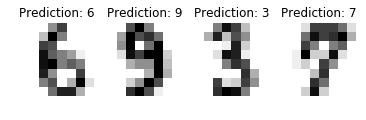

In [101]:
images_and_predictions = list(zip(map(lambda x: x.reshape(8,8), X_test), predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis('off')
    plt.imshow(image.reshape((8, 8)), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('Prediction: %i' % prediction)

plt.show()

In [105]:
gammas = map(lambda x: x["gamma"], classifier.cv_results_["params"])
testAccuracy = classifier.cv_results_["mean_test_score"]
print(zip(gammas, testAccuracy))

[(0, 0.10690423162583519), (0.001, 0.97438752783964366), (0.01, 0.65256124721603559), (0.015625, 0.36525612472160357), (0.1, 0.10690423162583519), (1, 0.10690423162583519)]


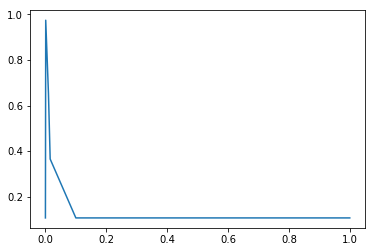

In [106]:
plt.plot(gammas,testAccuracy)

Acurracy:
0.391546162403
